# Импорты библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Чтение данных

In [2]:
df_path = "./marketplace.csv"

df = pd.read_csv(df_path)

df.head()

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0
2,user_000002,5,2025-01-19,2025-01-23,browser_02,2025-02-20,0.3,194.612980,485.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaN,0.0,138.780814,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0


# Чистка данных

In [3]:
display(df.describe())
df.info()

,platform_num,target,total_buy,total_return
count,25335.000000,25335.000000,25335.000000,25335.000000
mean,6.469982,0.001827,898.549417,334.082448
std,17.016845,0.251240,6815.549317,2882.914996
min,1.000000,-3.428557,0.000000,0.000000
25%,2.000000,0.000000,19.359396,0.000000
50%,3.000000,0.000000,52.715792,0.000000
75%,6.000000,0.000000,203.526684,0.000000
max,674.000000,0.300000,490447.985326,207893.840000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25335 entries, 0 to 25334
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       25335 non-null  object 
 1   platform_num  25335 non-null  int64  
 2   first_login   25335 non-null  object 
 3   reg_dt        25331 non-null  object 
 4   browser       25335 non-null  object 
 5   first_buy     24361 non-null  object 
 6   target        25335 non-null  float64
 7   total_buy     25335 non-null  float64
 8   total_return  25335 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB


### Работа с `platform_num`

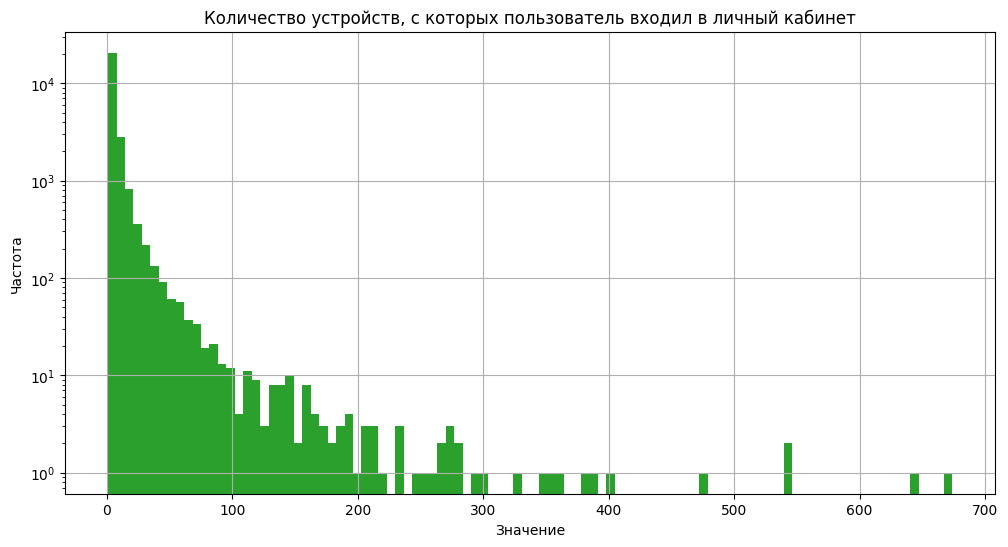

1927     674
14553    647
3067     542
18597    540
17874    475
Name: platform_num, dtype: int64

count    25335.000000
mean         6.469982
std         17.016845
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        674.000000
Name: platform_num, dtype: float64

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["platform_num"].hist(bins=100, log=True)

plt.title("Количество устройств, с которых пользователь входил в личный кабинет")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

display(df["platform_num"].nlargest())
display(df["platform_num"].describe())

* Для избавления от наиболее экстримальных значений, возьмем квантиль уровня `0.99`, снизив показатель максимума платформ до 60. 

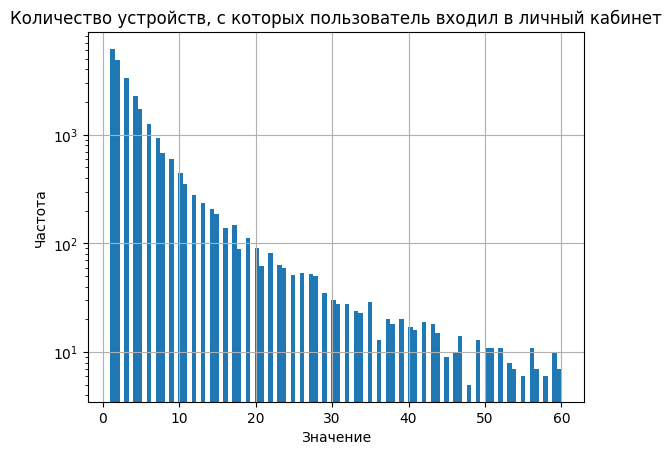

Количество подозрительных значений платформ по 99 %-ому квантилю: 250
Сопоставление количества аккаунтов до 10 устройств и более: 21823 | 3253


count    25076.000000
mean         5.209244
std          6.912249
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         60.000000
Name: platform_num, dtype: float64

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0
2,user_000002,5,2025-01-19,2025-01-23,browser_02,2025-02-20,0.3,194.612980,485.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaN,0.0,138.780814,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0


In [5]:
quant = df["platform_num"].quantile(0.99)

platform_tail_count = (df["platform_num"] > quant).sum()
df = df[df["platform_num"] < quant]

df["platform_num"].hist(bins=100, log=True)

plt.title("Количество устройств, с которых пользователь входил в личный кабинет")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

print(f"Количество подозрительных значений платформ по 99 %-ому квантилю: {platform_tail_count}")

before_target, after_target = (df["platform_num"] < 10).value_counts().values
print(f"Сопоставление количества аккаунтов до 10 устройств и более: {before_target} | {after_target}")

display(df["platform_num"].describe())
display(df.head())

Краткий итог:
1. Избавление от `250` экстримальных значений привело среднее и стандартное отклонение к сопоставимым показателям.
2. Большинство пользователей использует 6 или менее платформ
3. Однако, доля пользователей, превышающих установленный "не подозрительный" порог в 10 устройств, равна `~14.9%`

### Работа с `total_buy` и `total_return`

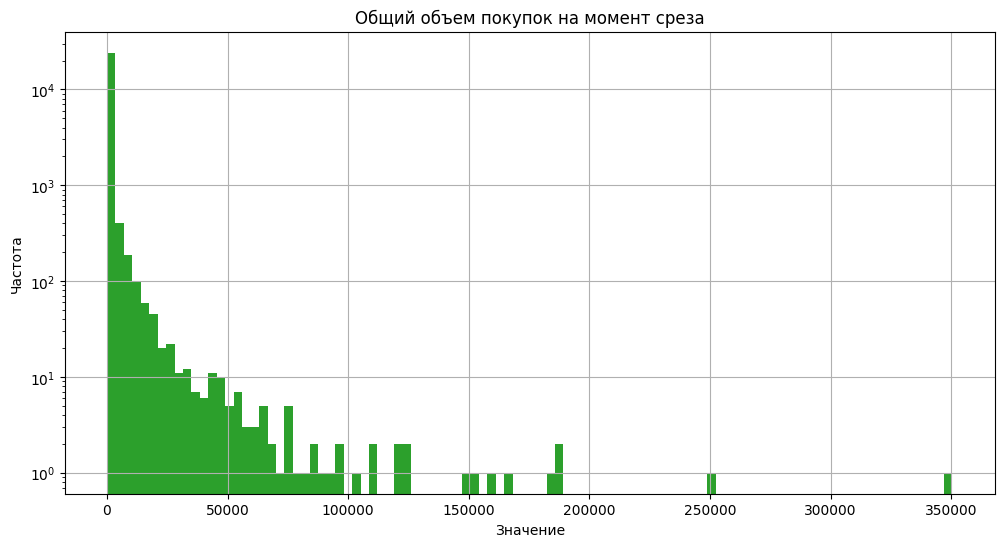

count     25076.000000
mean        810.246656
std        5778.349803
min           0.000000
25%          19.173075
50%          51.995138
75%         196.774180
max      350469.958544
Name: total_buy, dtype: float64

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["total_buy"].hist(bins=100, log=True)

plt.title("Общий объем покупок на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["total_buy"].describe()

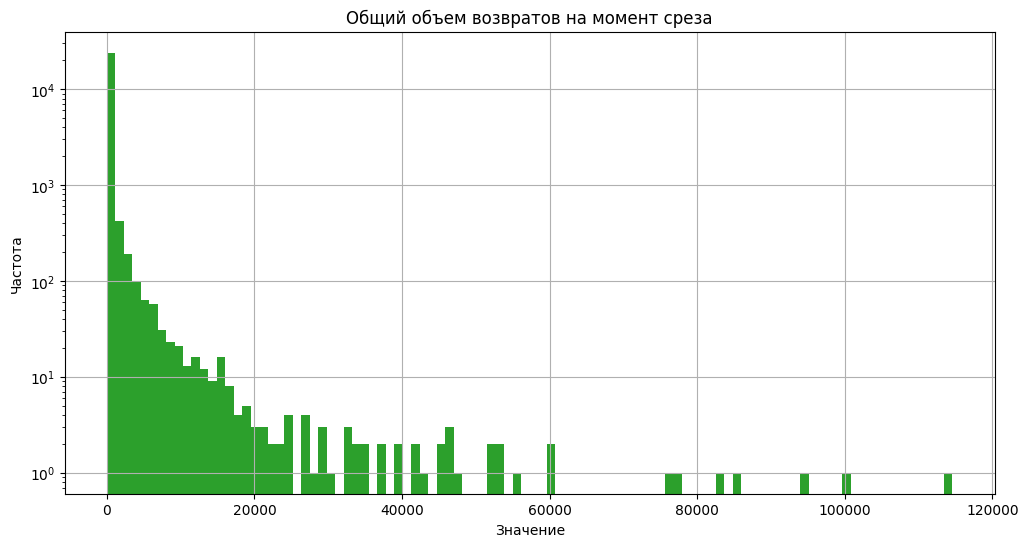

count     25076.000000
mean        299.681321
std        2482.100185
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      114583.530000
Name: total_return, dtype: float64

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["total_return"].hist(bins=100, log=True)

plt.title("Общий объем возвратов на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["total_return"].describe()

In [8]:
# проверка на наличие записей, где сумма покупок меньше суммы возвратов (чего в принципе невозможно)
buys_lt_return = df["total_buy"] < df["total_return"]

print("Сумма покупок меньше суммы возвратов:", buys_lt_return.sum())

# удаление этих записей
df = df.drop(df[buys_lt_return].index)


Сумма покупок меньше суммы возвратов: 1963


In [9]:
# сколько значений в хвосте каждой суммы, сосредоточенных в 1%
buys_tail_count = (df["total_buy"] > df["total_buy"].quantile(0.99)).sum()
return_tail_count = (df["total_return"] > df["total_return"].quantile(0.99)).sum()

print(f"Экстримальных значений для суммы покупок: {buys_tail_count}")
print(f"Экстримальных значений для суммы возвратов: {return_tail_count}")

Экстримальных значений для суммы покупок: 232
Экстримальных значений для суммы возвратов: 232


In [10]:
df[["total_buy", "total_return"]].describe()

,total_buy,total_return
count,23113.000000,23113.000000
mean,846.668831,273.158166
std,5995.398767,2500.137949
min,0.000000,0.000000
25%,19.567222,0.000000
50%,51.992601,0.000000
75%,199.401420,0.000000
max,350469.958544,114583.530000


Краткий итог:  
1. Итоговая сумма покупок и возвратов вполне может иметь _накопленный_ _"вес"_ равный максимумам `350469` и `114583` соответственно (то есть, это не разовые транзакции), поэтому назвать эти данные выбросами нельзя.
2. Для "сглаживания" данных можно применить логарифмичиское преобразование или отсечь длинный правый хвост с наиболее редкими и искажающими событиями (`232` строк для каждой из сумм).

### Работа с датами: `first_login`, `reg_dt` и `first_buy`

In [11]:
# преобразование в datetime для удобной работы и вычислений
date_columns = ["reg_dt", "first_buy", "first_login"]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

# статистика дат
print("Статистика 'first_login':")
display(df["first_login"].describe())
print("Статистика 'reg_dt':")
display(df["reg_dt"].describe())
print("Статистика 'first_buy':")
display(df["first_buy"].describe())

Статистика 'first_login':


count                            23113
mean     2025-03-16 09:17:25.281876224
min                2024-09-21 00:00:00
25%                2025-02-11 00:00:00
50%                2025-03-24 00:00:00
75%                2025-04-27 00:00:00
max                2025-07-26 00:00:00
Name: first_login, dtype: object

Статистика 'reg_dt':


count                            23109
mean     2024-12-10 00:29:24.715046400
min                2022-10-12 00:00:00
25%                2024-10-17 00:00:00
50%                2025-02-20 00:00:00
75%                2025-04-21 00:00:00
max                2025-07-26 00:00:00
Name: reg_dt, dtype: object

Статистика 'first_buy':


count                            22202
mean     2025-03-14 19:24:17.057922816
min                2023-08-08 00:00:00
25%                2025-02-14 00:00:00
50%                2025-03-26 00:00:00
75%                2025-05-04 00:00:00
max                2025-07-25 00:00:00
Name: first_buy, dtype: object

In [12]:
buys_without_first_buy_dt = df[(df["total_buy"] > 0) & (df["first_buy"].isna())]

print(f"Количество строк, где есть сумма покупок, но нет даты первой покупки: {buys_without_first_buy_dt["user_id"].count()}")

Количество строк, где есть сумма покупок, но нет даты первой покупки: 881


In [13]:
after_dates = ["reg_after_login", "login_after_buy", "reg_after_buy"]

diff_with_first_login_date = df["first_login"] - df["reg_dt"]
df["reg_after_login"] = diff_with_first_login_date.dt.days < 0

diff_with_first_login_date = df["first_buy"] - df["first_login"]
df["login_after_buy"] = diff_with_first_login_date.dt.days < 0

diff_with_reg_date = df["first_buy"] - df["reg_dt"]
df["reg_after_buy"] = diff_with_reg_date.dt.days < 0

print(f"Дата регистрация позже первого логина для {df["reg_after_login"].sum()} записей")
print(f"Дата первого логина позже первой покупки для {df["login_after_buy"].sum()} записей")
print(f"Дата регистрации позже первой покупки для {df["reg_after_buy"].sum()} записей")

display(df[after_dates].head(10))

Дата регистрация позже первого логина для 7884 записей
Дата первого логина позже первой покупки для 9236 записей
Дата регистрации позже первой покупки для 6858 записей


,reg_after_login,login_after_buy,reg_after_buy
0,False,False,False
1,True,False,False
3,False,False,False
4,True,False,True
5,False,False,False
6,False,True,False
7,False,True,False
8,False,False,False
10,True,False,False
11,False,False,False


Краткий вывод:
1. Даты выглядят наиболее некорректными, так как имеют логическое противоречие бизнес-логике (если предположить невозможность совершить покупку без регистрации или отсутствие гостевого входа):
- есть сумма покупок, но нет даты первой покупки для 881 записи
- дата регистрация позже первого логина для 7884 записей
- дата первого логина позже первой покупки для 9236 записей
- дата регистрации позже первой покупки для 6858 записей
2. Да, данные некорректные и занимают примерно 40% от всего объема. Мы их оставили, но для удобства присвоили метки о несоответствии. Для проверки некоторых гипотез это может быть критично.

## Создание дополнительных признаков

1. Признаки на основе дат  
- `diff_with_first_login` - интервал от первого логина до первой покупки
- `diff_with_reg_date` - интервал от регистрации до первой покупки

In [14]:
# для значений Nan и полученных отрицательных дат, присваиваем значение -1
df["diff_with_first_login"] = np.where(
    (df["first_buy"].notna()) & ((df["first_buy"] - df["first_login"]).dt.days > 0),
    (df["first_buy"] - df["first_login"]).dt.days,
    -1,
)

display(df["diff_with_first_login"].head())

df["diff_with_reg_date"] = np.where(
    (df["first_buy"].notna()) & ((df["first_buy"] - df["reg_dt"]).dt.days > 0),
    (df["first_buy"] - df["reg_dt"]).dt.days,
    -1,
)

display(df["diff_with_reg_date"].head())


0    -1.0
1    15.0
3    -1.0
4     6.0
5     3.0
Name: diff_with_first_login, dtype: float64

0    217.0
1      5.0
3     -1.0
4     -1.0
5    297.0
Name: diff_with_reg_date, dtype: float64

In [15]:
# группировка по времени, прошедшему с момента регистрации и первой покупкой
timing_bins = [-np.inf, 0, 8, np.inf]
timing_labels = [
    "reg_before_buys",
    "within_week",
    "long_delay",
]
df["reg_login_timing"] = pd.cut(
    df["diff_with_reg_date"],
    bins=timing_bins,
    labels=timing_labels,
    right=False,
)

display(df.head())

within_week_count = (df["reg_login_timing"] == "within_week").sum()
long_delay_count = (df["reg_login_timing"] == "long_delay").sum()

print(f"Интервал между регистрацией и покупкой ДО 7 дней: {within_week_count}")
print(f"Интервал между регистрацией и покупкой СВЫШЕ 7 дней: {long_delay_count}")

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return,reg_after_login,login_after_buy,reg_after_buy,diff_with_first_login,diff_with_reg_date,reg_login_timing
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0,False,False,False,-1.0,217.0,long_delay
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0,True,False,False,15.0,5.0,within_week
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaT,0.0,138.780814,0.0,False,False,False,-1.0,-1.0,reg_before_buys
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0,True,False,True,6.0,-1.0,reg_before_buys
5,user_000005,7,2025-03-27,2024-06-06,browser_02,2025-03-30,0.3,504.585202,0.0,False,False,False,3.0,297.0,long_delay


Интервал между регистрацией и покупкой ДО 7 дней: 4242
Интервал между регистрацией и покупкой СВЫШЕ 7 дней: 10363


2. Признаки для группировки
- `platform_num_group` - присвоение группы в зависимости от количества устройств
- `unexpected_platform_num` - присвоение True, если количество больше разумного

In [16]:
# разбиение на группы по количеству используемых устройств
platform_bins = [1, 4, 7, np.inf]
platform_labels = ["low", "medium", "high"]
df["platform_num_group"] = pd.cut(
    df["platform_num"],
    bins=platform_bins,
    labels=platform_labels,
    right=False,
)

display(df[["platform_num", "platform_num_group"]].head(10))


# добавление метки о подозрительном количестве устройств
trigger = 10
df["unexpected_platform_num"] = df["platform_num"] >= trigger

display(df[["platform_num", "unexpected_platform_num"]].head())

,platform_num,platform_num_group
0,12,high
1,1,low
3,3,low
4,1,low
5,7,high
6,4,medium
7,6,medium
8,3,low
10,4,medium
11,5,medium


,platform_num,unexpected_platform_num
0,12,True
1,1,False
3,3,False
4,1,False
5,7,False


* `browser_group_by_count` - группировка по количеству пользователей браузерами

In [17]:
browser_counts = df.groupby("browser")["user_id"].transform("count")

browser_bins = [1, 3000, 8000, float("inf")]
browser_labels = ["low", "medium", "high"]

df["browser_group_by_count"] = pd.cut(
    browser_counts,
    bins=browser_bins,
    labels=browser_labels,
    right=False,
)

display(df["browser_group_by_count"].head(18))

low_group_count = (df["browser_group_by_count"] == "low").sum()
medium_group_count = (df["browser_group_by_count"] == "medium").sum()
high_group_count = (df["browser_group_by_count"] == "high").sum()

print(f"Пользователей в браузерами в группе 'low': {low_group_count}")
print(f"Пользователей в браузерами в группе 'medium': {medium_group_count}")
print(f"Пользователей в браузерами в группе 'high': {high_group_count}")

0        low
1     medium
3       high
4        low
5       high
6       high
7     medium
8     medium
10    medium
11    medium
12    medium
13      high
14    medium
15       low
16      high
17       low
18       low
19      high
Name: browser_group_by_count, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Пользователей в браузерами в группе 'low': 5419
Пользователей в браузерами в группе 'medium': 8913
Пользователей в браузерами в группе 'high': 8781


3. Отношение суммы возврата, покупок. Совершались ли возвраты

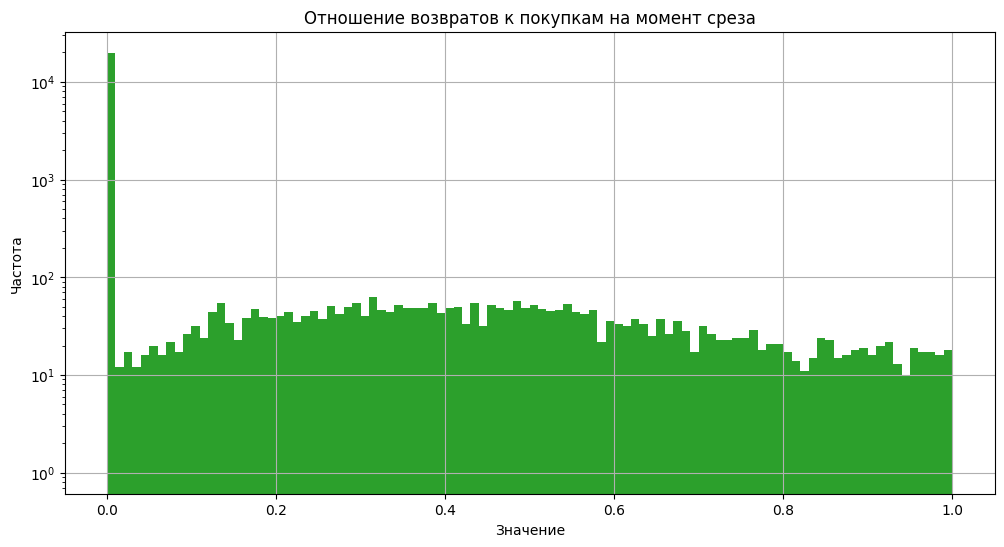

count    23113.000000
mean         0.064039
std          0.182294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.999871
Name: current_target, dtype: float64

In [18]:
df["current_target"] = np.where(
    df["total_buy"] != 0, 
    (df["total_return"] / df["total_buy"]), 
    0
)

plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["current_target"].hist(bins=100, log=True)

plt.title("Отношение возвратов к покупкам на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["current_target"].describe()

In [19]:
display(df.head())
display(df.describe())

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return,reg_after_login,login_after_buy,reg_after_buy,diff_with_first_login,diff_with_reg_date,reg_login_timing,platform_num_group,unexpected_platform_num,browser_group_by_count,current_target
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0,False,False,False,-1.0,217.0,long_delay,high,True,low,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0,True,False,False,15.0,5.0,within_week,low,False,medium,0.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaT,0.0,138.780814,0.0,False,False,False,-1.0,-1.0,reg_before_buys,low,False,high,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0,True,False,True,6.0,-1.0,reg_before_buys,low,False,low,0.0
5,user_000005,7,2025-03-27,2024-06-06,browser_02,2025-03-30,0.3,504.585202,0.0,False,False,False,3.0,297.0,long_delay,high,False,high,0.0


,platform_num,first_login,reg_dt,first_buy,target,total_buy,total_return,diff_with_first_login,diff_with_reg_date,current_target
count,23113.000000,23113,23109,22202,23113.000000,23113.000000,23113.000000,23113.000000,23113.000000,23113.000000
mean,5.176524,2025-03-16 09:17:25.281876224,2024-12-10 00:29:24.715046400,2025-03-14 19:24:17.057922816,0.004870,846.668831,273.158166,8.078614,88.690607,0.064039
min,1.000000,2024-09-21 00:00:00,2022-10-12 00:00:00,2023-08-08 00:00:00,-3.428557,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.000000,2025-02-11 00:00:00,2024-10-17 00:00:00,2025-02-14 00:00:00,0.000000,19.567222,0.000000,-1.000000,-1.000000,0.000000
50%,3.000000,2025-03-24 00:00:00,2025-02-20 00:00:00,2025-03-26 00:00:00,0.000000,51.992601,0.000000,1.000000,5.000000,0.000000
75%,6.000000,2025-04-27 00:00:00,2025-04-21 00:00:00,2025-05-04 00:00:00,0.000000,199.401420,0.000000,9.000000,40.000000,0.000000
max,60.000000,2025-07-26 00:00:00,2025-07-26 00:00:00,2025-07-25 00:00:00,0.300000,350469.958544,114583.530000,275.000000,999.000000,0.999871
std,6.916533,NaN,NaN,NaN,0.229421,5995.398767,2500.137949,19.960850,190.999499,0.182294


# Гипотезы

### Гипотеза №1.

Пользователи с высокой долей возвратов на момент среза (`current_target`), будут иметь высокий прогнозируемый показатель возвратов (`target`) в будущем.

### Гипотеза №2*.

Низкая вовлеченность пользователя: чем больше интервал между первой покупкой и регистрацией, тем ниже изначальная заинтересованность, что увеличивает вероятность возврата. Сравнение по группам интервалов: "_до 7 дней_" | "_после_" - есть ли статистически значимые различия `target` между этими группами.

*В ходе анализа данных было выявлено, что для `~35%` строк данных, дата первой покупки наступила раньше, чем дата регистрации пользователя. Для корректности и полноты проверки других гипотез, эти данные не были преобразованы или удалены. Но для данной гипотезы эти искажения критичны, потому не будут учитываться, исходя из предположения, что нельзя оформить покупку без регистрации в сервисе.

### Гипотеза №3.

В зависимости от принадлжености к группе по количеству используемых платформ (`platform_num_group`): для категории с низким количеством показатель будущих возвратов будет низким, а для групп с большим количеством - более высоким.

### Гипотеза №4.

В зависимости от принадлжености к группе браузеров в разрезе количества пользователей (`browser_group_by_count`): пользователи определенной группы имеют больший показатель возвратов, чем другие.

# Проверка гипотез.

## Гипотеза №1.

### Построение нулевой и альтернативной гипотез.

1. Проверяем, есть ли монотонная положительная связь между `current_target` (доля возвратов на момент среза) и `target` (отношение возвратов в следующем месяце):
 - Нулевую гипотеза H<sub>0</sub>: "Между `current_target` и `target` нет связи"
 - Альтернативная гипотеза H<sub>1</sub>: "Между `current_target` и `target` есть положительная монотонная связь"

2. Проверка разницы среднего `target` в двух группах при разделении `current_target` по пороговому значению `0.25` (выбранное значение позволяет сформировать достаточно крупную группу клиентов для проведения сравнений), где `HIGH = current_target >= 0.25`, `LOW = current_target < 0.25`:
 - Нулевую гипотеза H<sub>0</sub>: "Средние показатели `target` равны для обеих групп"
 - Альтернативная гипотеза H<sub>1</sub>: "Средние показатели `target` у группы `HIGH` больше, чем у `LOW`"

### Выбор уровня значимости.

Примем уровень значимости на уровне `alpha = 0.05`

### Данные для проверки гипотезы.

In [20]:
thesis_1 = df[["current_target", "target"]].copy()

In [ ]:
threshold = 0.25  # повысить порог и проверять только возвращающих
current_target_bins = [0, threshold, np.inf]
current_target_labels = ["low", "high"]

thesis_1["current_target_group"] = pd.cut(
    thesis_1["current_target"],
    bins=current_target_bins,
    labels=current_target_labels,
    right=False,
)

print("Статистика по current_target:")
display(thesis_1["current_target"].describe())

zeros_curr_target = (thesis_1["current_target"] == 0).sum()
print(f"Количество нулевых значений current_target от общего количества: {zeros_curr_target} | {thesis_1["current_target"].count()} \n")

print("Проверка на корректность разделения по группам:")
display(thesis_1[(thesis_1["current_target"] > 0.2) & (thesis_1["current_target"] < 0.3)].head())

low_curr_target_group = (thesis_1["current_target"] < threshold).sum()
high_curr_target_group = (thesis_1["current_target"] >= threshold).sum()

print(f"Соотношение групп LOW | HIGH по количеству записей: {low_curr_target_group} | {high_curr_target_group}")

Статистика по current_target:


count    23113.000000
mean         0.064039
std          0.182294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.999871
Name: current_target, dtype: float64

Количество нулевых значений current_target от общего количества: 19860 | 23113 

Проверка на корректность разделения по группам:


,current_target,target,current_target_group
39,0.254908,0.0,high
86,0.258323,0.3,high
175,0.228536,0.0,low
361,0.214236,0.0,low
395,0.215796,0.0,low


Соотношение групп LOW | HIGH по количеству записей: 20600 | 2513


### Выбор статистического теста.

1. Для проверки на монотонную положительную связь выбран тест Спирмена, так как переменные `current_target` и `target` - непрерывные, но не являются нормально-распределенными, имеют много нулевых значений.
2. Для группового сравнения `current_target` по `LOW` | `HIGH`- тест Манна-Уитни (однонаправленный) по тем же причинам, что и в предыдущем пункте.

### Проведение статистического теста, вычисление p-value.

1. Проверка на монотонную положительную связь: тест Спирмена

In [29]:
# проверка статистики по Спирмену
p_s, p_value = stats.spearmanr(thesis_1["current_target"], thesis_1["target"], alternative="greater")
print(f"Рассчетное значение статистики Спирмена: {p_s:.4f}")
print(f"Рассчетное значение p-value: {p_value:.4e}")

Рассчетное значение статистики Спирмена: 0.1120
Рассчетное значение p-value: 9.1724e-66


In [23]:
# нахождение доверительного интервала с помощью бутстрэп-метода
x = thesis_1["current_target"].values
y = thesis_1["target"].values
data = (x, y)

def spearman_statistic(x_array, y_array):
    return stats.spearmanr(x_array, y_array)[0]

bootstrap_ci_spearmen = stats.bootstrap(
    data,
    spearman_statistic,
    confidence_level=0.95,
    n_resamples=2000,
    paired=True,
    random_state=0,
    method="percentile",
)

ci_lower, ci_upper = bootstrap_ci_spearmen.confidence_interval
mean_stats = np.mean(bootstrap_ci_spearmen.bootstrap_distribution)

print(f"Бутстрэп для доверительного интервала с уровнем 0.95: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Среднее значение статистики: {mean_stats:.4f}")

Бутстрэп для доверительного интервала с уровнем 0.95: (0.0924, 0.1309)
Среднее значение статистики: 0.1120


2. Сравнение групп: тест Манна-Уитни (односторонний)

In [24]:
high_target_group = thesis_1.loc[thesis_1["current_target_group"] == "high", "target"]
low_target_group = thesis_1.loc[thesis_1["current_target_group"] == "low", "target"]

u, p_value = stats.mannwhitneyu(high_target_group, low_target_group, alternative="greater")

print(f"Статистика по Манна-Уитни: {u}, p-value: {p_value:.4e}")
print(f"Среднее 'HIGH' группы: {high_target_group.mean():.4f}")
print(f"Среднее 'LOW' группы: {low_target_group.mean():.4f}")

Статистика по Манна-Уитни: 28226410.5, p-value: 2.1613e-51
Среднее 'HIGH' группы: -0.0087
Среднее 'LOW' группы: 0.0065


In [25]:
# нахождение рангового бисериального коэффициента
n1 = len(high_target_group)
n2 = len(low_target_group)
rank_biserial = 1 - (2*u)/(n1*n2)
print(f"Бисериальный коэффициент: {rank_biserial:.4f}")

Бисериальный коэффициент: -0.0905


### Сравнение p-value c уровнем значимости и вывод.

1. Значения `p-value`, стремящиеся к нулю, объясняются большим объёмом выборки и не отражают эффект от теста.
2. Тест Спирмена выявил монотонную положительную связь, но её величина слишком мала (`p_s ~ 0.112`, доверительный интервал `(0.09, 0.13)`), чтобы говорить о значимой зависимости между показателями.
3. Групповое сравнение двух групп также не подтверждает исходную гипотезу, что высокий `current_target` связан с увеличением `target` в следующем периоде. Ранговый бисериальный коэффициент около `rank_biserial ~ -0.1` свидетельствует о слабом отрицательном эффекте, то есть выбранный порог `threshold = 0.25` не отражает направления общей тенденции.

### Визуализация

Визуализация распределения, построение Q-Q графиков.

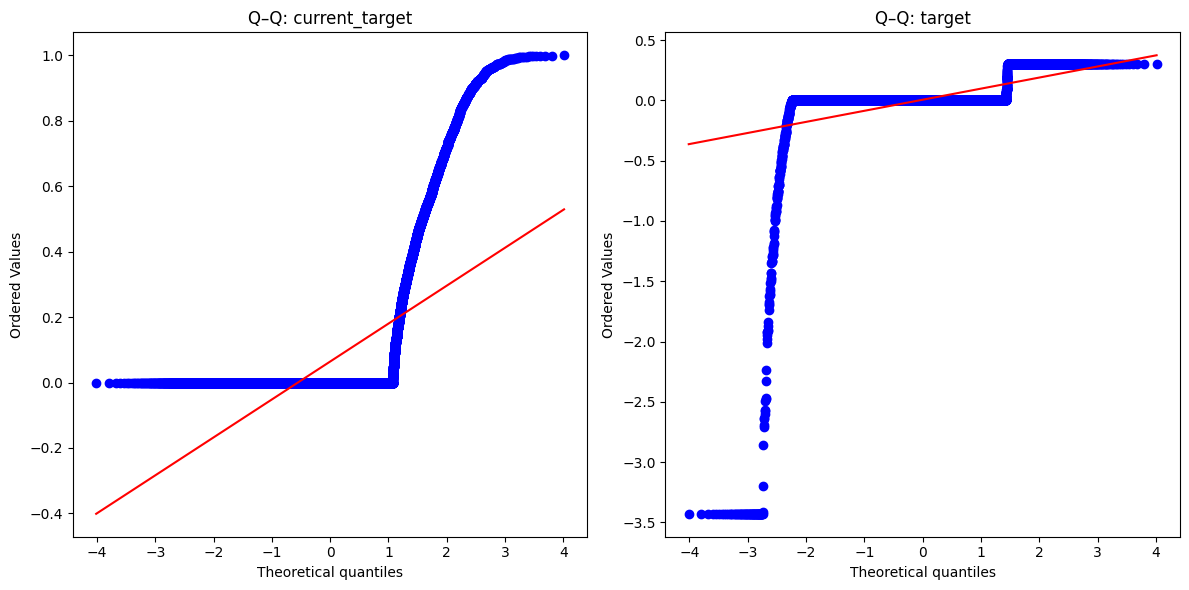

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

stats.probplot(thesis_1["current_target"], dist="norm", plot=axes[0])
axes[0].set_title("Q–Q: current_target")

stats.probplot(thesis_1["target"], dist="norm", plot=axes[1])
axes[1].set_title("Q–Q: target")

plt.tight_layout()
plt.show()

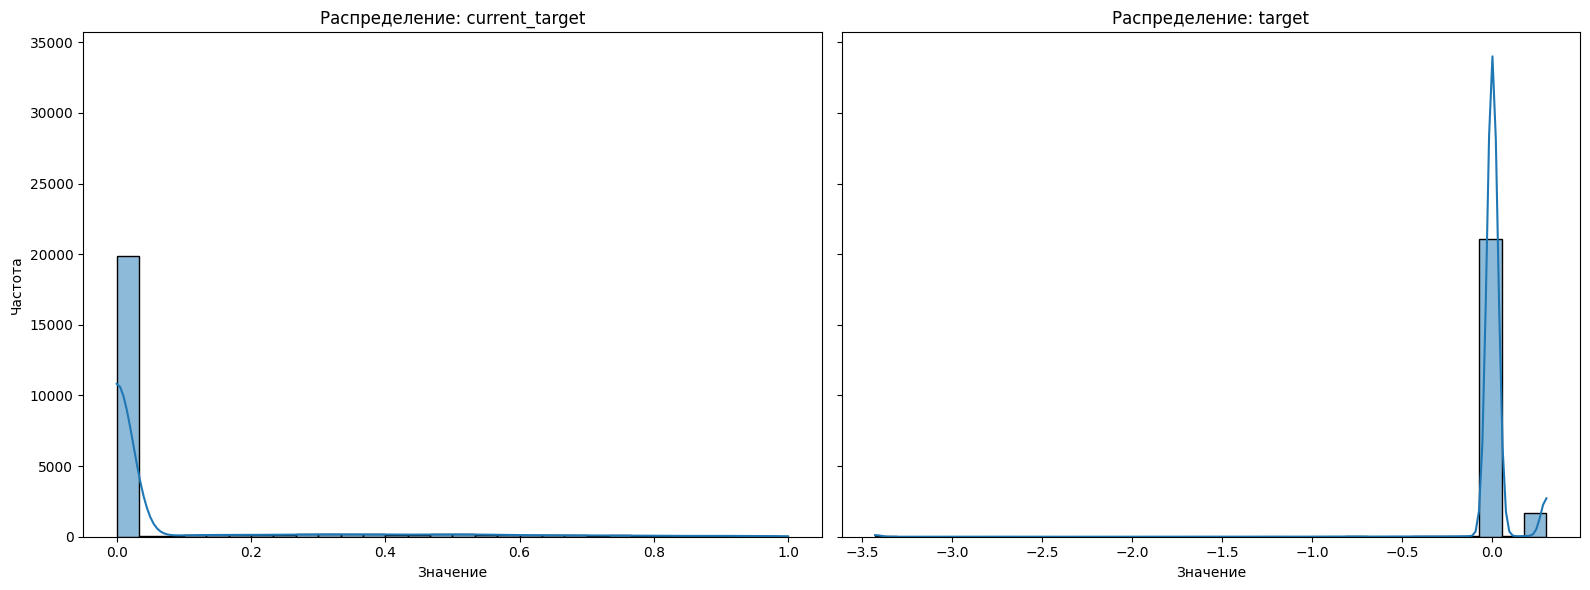

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.histplot(thesis_1["current_target"].dropna(), kde=True, ax=ax1, bins=30)
ax1.set_title("Распределение: current_target", fontsize=12)
ax1.set_xlabel("Значение")
ax1.set_ylabel("Частота")

sns.histplot(thesis_1["target"].dropna(), kde=True, ax=ax2, bins=30)
ax2.set_title("Распределение: target", fontsize=12)
ax2.set_xlabel("Значение")
ax2.set_ylabel("Частота")

plt.tight_layout()
plt.show()

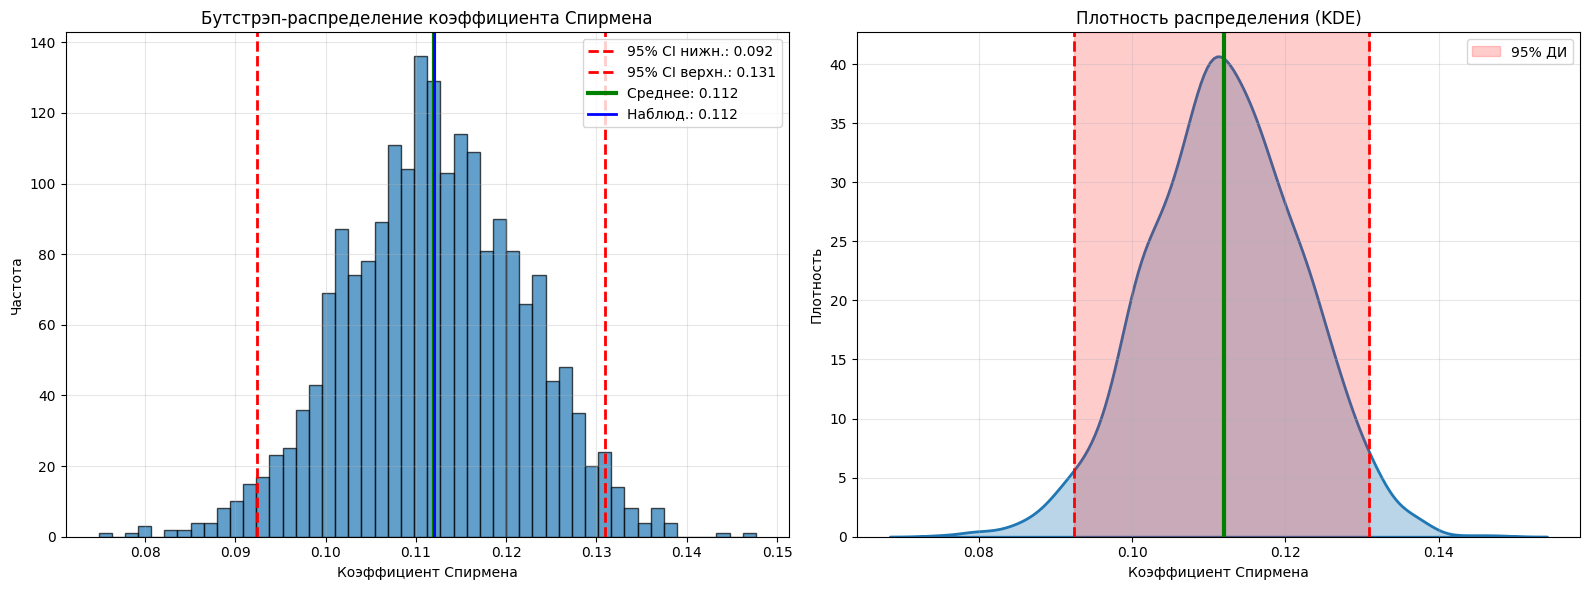

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма с доверительным интервалом
ax1.hist(bootstrap_ci_spearmen.bootstrap_distribution, bins=50, edgecolor="black", alpha=0.7)
ax1.axvline(ci_lower, color="red", linestyle="--", linewidth=2, label=f"95% CI нижн.: {ci_lower:.3f}")
ax1.axvline(ci_upper, color="red", linestyle="--", linewidth=2, label=f"95% CI верхн.: {ci_upper:.3f}")
ax1.axvline(mean_stats, color="green", linestyle="-", linewidth=3, label=f"Среднее: {mean_stats:.3f}")
ax1.axvline(stats.spearmanr(x, y)[0], color="blue", linestyle="-", 
            linewidth=2, label=f"Наблюд.: {stats.spearmanr(x, y)[0]:.3f}")
ax1.set_xlabel("Коэффициент Спирмена")
ax1.set_ylabel("Частота")
ax1.set_title("Бутстрэп-распределение коэффициента Спирмена")
ax1.legend()
ax1.grid(True, alpha=0.3)

# KDE plot с доверительным интервалом
sns.kdeplot(bootstrap_ci_spearmen.bootstrap_distribution, ax=ax2, linewidth=2, fill=True, alpha=0.3)
ax2.axvline(ci_lower, color="red", linestyle="--", linewidth=2)
ax2.axvline(ci_upper, color="red", linestyle="--", linewidth=2)
ax2.axvspan(ci_lower, ci_upper, alpha=0.2, color="red", label="95% ДИ")
ax2.axvline(mean_stats, color="green", linestyle="-", linewidth=3)
ax2.set_xlabel("Коэффициент Спирмена")
ax2.set_ylabel("Плотность")
ax2.set_title("Плотность распределения (KDE)")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()